# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Laila Dwi Kartika Sari
- **Email:** e41220341@student.polije.ac.id
- **ID Dicoding:**  lailadwikartikasari

## Menentukan Pertanyaan Bisnis

1. Bagaimana hubungan antara kondisi cuaca (weathersit) dengan jumlah penyewaan sepeda (cnt)?
2. Bagaimana tren peminjaman sepeda berdasarkan hari dalam seminggu dan pola peminjaman sepeda berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
1. Menggunakan python dan library untuk membaca sebuah file CSV.
2. Menampilkan 5 baris pertama dari data day dan hour.

### Assessing Data

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
1. Menghasilkan statistik deskriptif dari kolom dalam DataFrame.
2. Mendapatkan gambaran umum tentang karakteritik data numerik.
3. Mengidentifikasi outlier potensial.

### Cleaning Data

### Membersihkan data day





1.  Duplicate data day

In [17]:
day_df.duplicated().sum()

0

In [18]:
day_df.drop_duplicates(inplace=True)

In [19]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


2. Missing Values

In [20]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


3. Inaccurate value

In [21]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Membersihkan tabel Hour




1. Duplicade Data Hour

In [22]:
hour_df.duplicated().sum()

0

In [23]:
hour_df.drop_duplicates(inplace=True)

In [24]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


2. Missing Values

In [25]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


3. Inaccurate value

In [26]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
1. Melakukan proses penghapusan duplikasi dari data frame.
2. Melakuka verifikasi keberhasilan penghapusan duplikasi.
3. Melakukan pemeriksaan ulang nilai null setelah penghapusan duplikasi.
4. Melakukan perubahan statistik deskriptif setelah data dibersihkan.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [44]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
401,402,2012-02-06,1,1,2,0,1,1,1,0.282609,0.296426,0.622174,0.153800,206,3578,3784
179,180,2011-06-29,3,0,6,0,3,1,1,0.728333,0.654688,0.497917,0.261821,848,4377,5225
608,609,2012-08-31,3,1,8,0,5,1,1,0.764167,0.689400,0.587500,0.168533,1433,5917,7350
650,651,2012-10-12,4,1,10,0,5,1,1,0.437500,0.433071,0.539167,0.235092,1060,6222,7282
237,238,2011-08-26,3,0,8,0,5,1,1,0.700000,0.659733,0.761250,0.083962,768,3893,4661


In [45]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Explore Hour_df

In [29]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14420,14421,2012-08-29,3,1,8,1,0,3,1,1,0.64,0.6061,0.69,0.1343,2,12,14
16017,16018,2012-11-05,4,1,11,2,0,1,1,2,0.30,0.3030,0.56,0.1642,2,4,6
7488,7489,2011-11-13,4,0,11,15,0,0,0,2,0.50,0.4848,0.42,0.3284,89,221,310
6466,6467,2011-10-02,4,0,10,0,0,0,0,3,0.36,0.3333,0.93,0.2985,4,43,47
8085,8086,2011-12-08,4,0,12,13,0,4,1,1,0.30,0.2727,0.49,0.3582,9,115,124


In [30]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Menggabungkan data day dan Hour

In [31]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
day_hour_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [32]:

Bike_Sharing_df = pd.merge(
    left=day_hour_df,
    right=day_hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
Bike_Sharing_df.head()


,instant,dteday_x_x,season_x_x,yr_x_x,mnth_x_x,holiday_x_x,weekday_x_x,workingday_x_x,weathersit_x_x,temp_x_x,...,weekday_y_y,workingday_y_y,weathersit_y_y,temp_y_y,atemp_y_y,hum_y_y,windspeed_y_y,casual_y_y,registered_y_y,cnt_y_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [33]:
Bike_Sharing_df.to_csv("Bike_Sharing.csv", index=False)

In [52]:
Bike_Sharing_df.groupby(by="weathersit_y_x").agg({
    "instant": "nunique",
    "weathersit_y_x": ["max", "min", "mean", "std"]
})

instant weathersit_y_x              
               nunique            max min mean  std
weathersit_y_x                                     
1                  420              1   1  1.0  0.0
2                  247              2   2  2.0  0.0
3                   63              3   3  3.0  0.0
4                    1              4   4  4.0  NaN

**Insight:**
1. Melakukan pemeriksaan data secara acak dan deskriptif.
2. Melakukan penggabungan data dari dua sumber berdasarkan kolom yang sama.
3. Melakukan penyimpanan data hasil penggabungan ke dalam file CSV.
4. Terdapat sebuah proses merge yang tidak perlu.

## Visualization & Explanatory Analysis

In [34]:
Bike_Sharing_df = pd.read_csv("Bike_Sharing.csv")
Bike_Sharing_df.head()

,instant,dteday_x_x,season_x_x,yr_x_x,mnth_x_x,holiday_x_x,weekday_x_x,workingday_x_x,weathersit_x_x,temp_x_x,...,weekday_y_y,workingday_y_y,weathersit_y_y,temp_y_y,atemp_y_y,hum_y_y,windspeed_y_y,casual_y_y,registered_y_y,cnt_y_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
Bike_Sharing_df.sample(5)

,instant,dteday_x_x,season_x_x,yr_x_x,mnth_x_x,holiday_x_x,weekday_x_x,workingday_x_x,weathersit_x_x,temp_x_x,...,weekday_y_y,workingday_y_y,weathersit_y_y,temp_y_y,atemp_y_y,hum_y_y,windspeed_y_y,casual_y_y,registered_y_y,cnt_y_y
342,343,2011-12-09,4,0,12,0,5,1,1,0.290833,...,6,0,2,0.30,0.2879,0.45,0.2537,15,69,84
561,562,2012-07-15,3,1,7,0,0,0,1,0.745833,...,2,1,2,0.30,0.3333,0.45,0.0000,11,57,68
157,158,2011-06-07,2,0,6,0,2,1,1,0.707500,...,5,1,1,0.18,0.2121,0.47,0.1045,1,50,51
180,181,2011-06-30,3,0,6,0,4,1,1,0.696667,...,6,0,1,0.14,0.1212,0.36,0.2537,4,26,30
229,230,2011-08-18,3,0,8,0,4,1,1,0.711667,...,1,1,1,0.16,0.1667,0.50,0.1642,1,73,74


### Pertanyaan 1:
Bagaimana pola antara kondisi cuaca (weathersit) dengan jumlah penyewaan sepeda (cnt)?

<ipython-input-55-67dabdfa4813>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_rentals.index, y=weather_rentals.values, order=weather_rentals.index, palette=colors)


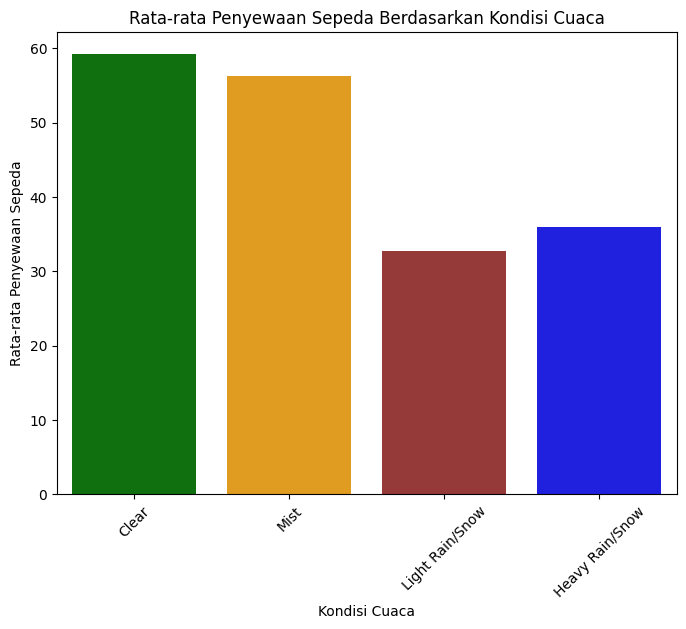

In [55]:
# Mapping for weather situations
weathersit_mapping = {1: "Clear", 2: "Mist", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}

# Group data by weather situation and calculate the average bike rentals
weather_rentals = Bike_Sharing_df.groupby('weathersit_y_x')['cnt_y_x'].mean()

# Convert index to meaningful labels using weathersit_mapping
weather_rentals.index = weather_rentals.index.map(weathersit_mapping)

# Create a bar plot
plt.figure(figsize=(8, 6))
colors = ['green', 'orange', 'brown', 'blue'] # list warna yang diinginkan
sns.barplot(x=weather_rentals.index, y=weather_rentals.values, order=weather_rentals.index, palette=colors)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca
plt.show()

### Pertanyaan 2:
Bagaimana tren peminjaman sepeda berdasarkan hari dalam seminggu dan pola peminjaman sepeda berdasarkan jam dalam sehari?

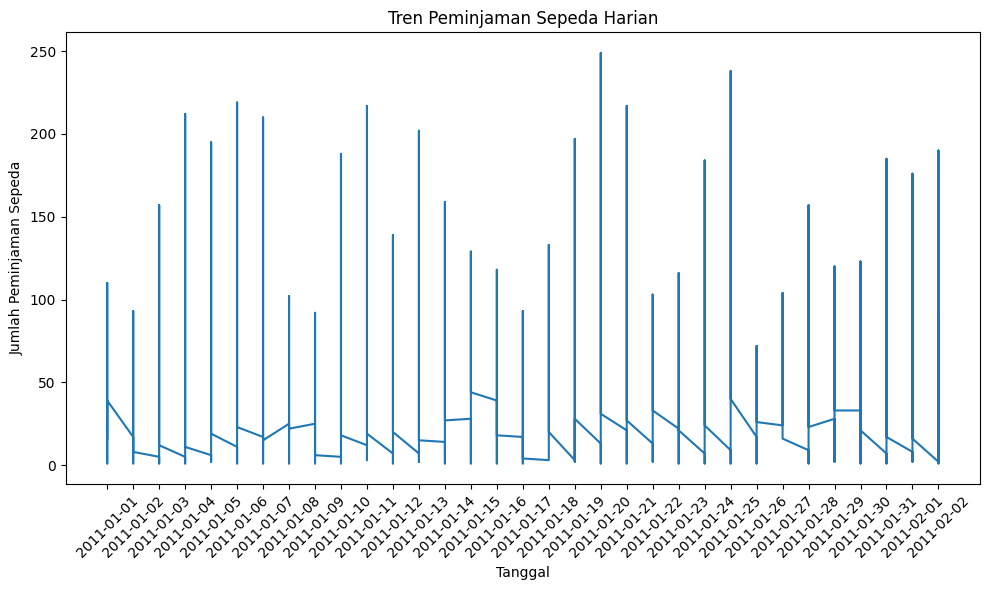

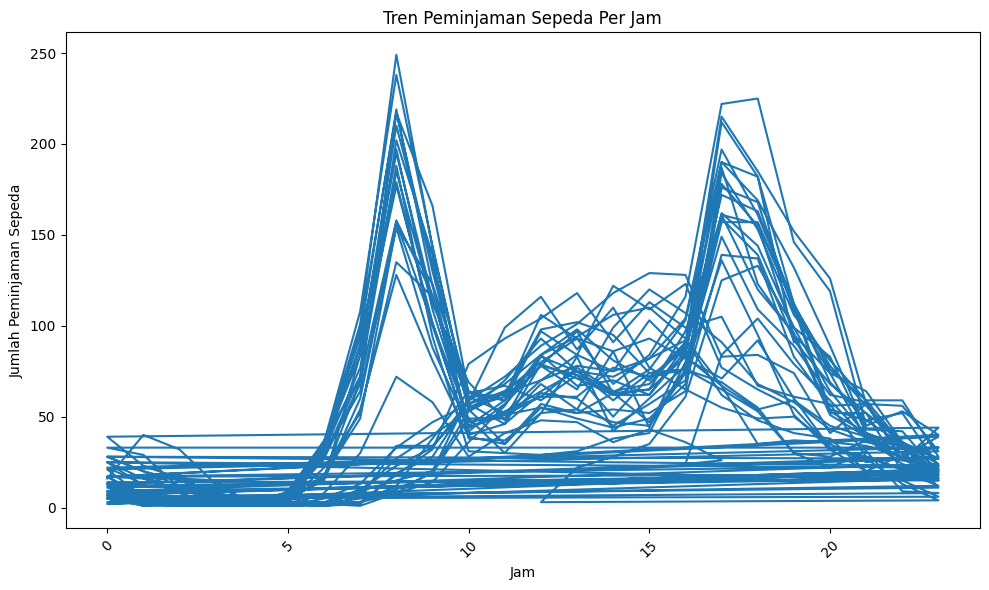

In [43]:
# Tren Peminjaman Sepeda Harian
plt.figure(figsize=(10, 6))
plt.plot(Bike_Sharing_df['dteday_y_x'], Bike_Sharing_df['cnt_y_x'])  # Gunakan 'cnt_x' untuk data harian
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Tren Peminjaman Sepeda Harian')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tren Peminjaman Sepeda Per Jam
plt.figure(figsize=(10, 6))
plt.plot(Bike_Sharing_df['hr_y'], Bike_Sharing_df['cnt_y_x'])  # Gunakan 'cnt_y' untuk data per jam
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Tren Peminjaman Sepeda Per Jam')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight:**
1. Visualisasi memberikan wawasan yang berharga tentang tren dan pola dalam data peminjaman sepeda.
2. Analisis lebih lanjut dapat dilakukan dengan menambahkan filter, menghitung statistik deskriptif, atau menggunakan teknik pemodelan prediktif.
3. Grafik yang dihasilkan, sangat informatif.

## Analisis Lanjutan (Opsional)

In [ ]:
# prompt: bedakan statistik untuk tiap musim dalam bentuk statustik

# Statistik untuk setiap musim
season_stats = Bike_Sharing_df.groupby('season_y_x')['cnt_y_x'].agg(['mean', 'median', 'min', 'max', 'std'])

# Mapping angka musim ke nama musim
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_stats.index = season_stats.index.map(season_labels)

season_stats


,mean,median,min,max,std
season_y_x,,,,,
Spring,55.902873,48.0,1,249,48.996339


Melakukan clustering musim terhadap dataset Bike-Sharing dengan mengklasifikasikan mean,median,min,max dan std

## Conclusion

1. Pertanyaan 1:
- Plot ini menunjukkan bagaimana kondisi cuaca memengaruhi rata-rata jumlah penyewaan sepeda.
- Kita dapat melihat kondisi cuaca mana yang cenderung menghasilkan penyewaan sepeda tertinggi dan terendah.
2. Pertanyaan 2:
- Menyesuaikan ketersediaan sepeda dan staf berdasarkan pola harian dan jam sibuk.
- Merencanakan promosi dan kampanye pemasaran pada waktu-waktu tertentu.
- Mengantisipasi lonjakan atau penurunan peminjaman akibat cuaca atau peristiwa khusus.
